In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil
import time
import copy

In [ ]:
!git clone https://github.com/prajnasb/observations

In [ ]:
!ls observations/experiements/dest_folder/

### Creating image datasets an data loaders for train and test using the experiments folder split

In [2]:
experiments_path = 'experiements/dest_folder/'
data_path = 'experiements/data/'

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(), 
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), 
    'test' : transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [4]:
def get_train_files_path(experiments_path, data_path, phase):
    if phase == 'train':
        file_name = 'train.csv'
    elif phase == 'test':
        file_name = 'test.csv'
    else:
        print("phase can only have train and test as parameter values")
        exit()
    file_path = os.path.join(experiments_path, file_name)
    train_df = pd.read_csv(file_path, delimiter=',')
    files_path = []
    fonts_class = []
    for row in train_df.iterrows():
        files_path.append(os.path.join(data_path, row[1]['class'], row[1]['filename']))
        fonts_class.append(row[1]['class'])
 
    return files_path, fonts_class

In [5]:
def copy_images_to_path(file_path, file_class, destination_dir):
    font_folder = os.path.join(destination_dir, file_class)
    if os.path.exists(font_folder) == False:
        os.makedirs(font_folder)
    
    print("File being copied from {}:{}".format(file_path, font_folder))
    shutil.copy(file_path, font_folder)
    #shutil.copyfile(file_path, font_folder)
    

In [6]:
X_train, y_train = get_train_files_path(experiments_path, data_path, phase='train')
X_test, y_test = get_train_files_path(experiments_path, data_path, phase='test')

In [7]:
train_dir = os.path.join(experiments_path, 'train')
test_dir = os.path.join(experiments_path, 'test')

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

In [8]:
for file_path, font_class in zip(X_train, y_train):
    copy_images_to_path(file_path, font_class, train_dir)

File being copied from experiements/data/inappropriate_mask\0-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\1-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\10-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\100-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\101-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\102-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\104-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\105-inap-mask.jpg:experiements/dest_folder/train\

File being copied from experiements/data/inappropriate_mask\229-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\23-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\230-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\231-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\232-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\233-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\234-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\237-inap-mask.jpg:experiements/dest_folder/tr

File being copied from experiements/data/inappropriate_mask\308-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\309-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\31-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\310-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\311-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\312-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\315-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\316-inap-mask.jpg:experiements/dest_folder/tr

File being copied from experiements/data/inappropriate_mask\450-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\451-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\452-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\453-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\454-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\455-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\456-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\457-inap-mask.jpg:experiements/dest_folder/t

File being copied from experiements/data/inappropriate_mask\92-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\93-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\94-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\95-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\96-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\97-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\98-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\99-inap-mask.jpg:experiements/dest_folder/train\ina

File being copied from experiements/data/inappropriate_mask\augmented_image_172-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_173-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_174-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_175-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_176-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_177-inap-mask.jpg:experiements/dest_folder/train\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_179-inap-mask.jpg:experiements/dest_folder/train\inappropria

File being copied from experiements/data/with_mask\112-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\113-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\114-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\115-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\116-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\117-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\118-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\119-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\12-with-mask.jpg:experiements/dest_folder/train\with_mask
File being 

File being copied from experiements/data/with_mask\192-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\193-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\194-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\195-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\196-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\197-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\198-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\2-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\200-with-mask.jpg:experiements/dest_folder/train\with_mask
File being c

File being copied from experiements/data/with_mask\343-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\344-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\345-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\346-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\347-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\348-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\349-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\35-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\351-with-mask.jpg:experiements/dest_folder/train\with_mask
File being 

File being copied from experiements/data/with_mask\57-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\59-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\6-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\61-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\62-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\64-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\65-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\67-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\68-with-mask.jpg:experiements/dest_folder/train\with_mask
File being copied fr

File being copied from experiements/data/with_mask\augmented_image_176.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\augmented_image_177.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\augmented_image_178.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\augmented_image_179.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\augmented_image_18.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\augmented_image_180.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\augmented_image_181.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\augmented_image_182.jpg:experiements/dest_folder/train\with_mask
File being copied from experiements/data/with_mask\augmented_image_183.jp

File being copied from experiements/data/without_mask\118.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\119.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\12.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\120.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\122.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\123.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\124.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\125.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\127.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/withou

File being copied from experiements/data/without_mask\207.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\208.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\210.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\211.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\212.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\213.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\214.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\215.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\216.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/witho

File being copied from experiements/data/without_mask\300.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\301.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\302.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\303.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\306.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\307.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\308.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\309.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\31.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/withou

File being copied from experiements/data/without_mask\398.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\399.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\4.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\40.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\400.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\401.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\402.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\403.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\404.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_

File being copied from experiements/data/without_mask\67.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\69.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\7.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\70.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\73.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\74.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\76.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\77.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\79.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\80

File being copied from experiements/data/without_mask\augmented_image_17.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\augmented_image_170.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\augmented_image_171.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\augmented_image_172.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\augmented_image_173.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\augmented_image_174.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\augmented_image_175.jpg:experiements/dest_folder/train\without_mask
File being copied from experiements/data/without_mask\augmented_image_176.jpg:experiements/dest_folder/train\without_mask
File being copied from ex

In [9]:
for file_path, font_class in zip(X_test, y_test):
    copy_images_to_path(file_path, font_class, test_dir)

File being copied from experiements/data/inappropriate_mask\augmented_image_238-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_239-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_240-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_241-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_243-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_244-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_245-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask

File being copied from experiements/data/inappropriate_mask\augmented_image_317-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_318-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_319-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_32-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_33-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_36-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask
File being copied from experiements/data/inappropriate_mask\augmented_image_37-inap-mask.jpg:experiements/dest_folder/test\inappropriate_mask
Fil

File being copied from experiements/data/with_mask\augmented_image_234.jpg:experiements/dest_folder/test\with_mask
File being copied from experiements/data/with_mask\augmented_image_235.jpg:experiements/dest_folder/test\with_mask
File being copied from experiements/data/with_mask\augmented_image_236.jpg:experiements/dest_folder/test\with_mask
File being copied from experiements/data/with_mask\augmented_image_237.jpg:experiements/dest_folder/test\with_mask
File being copied from experiements/data/with_mask\augmented_image_238.jpg:experiements/dest_folder/test\with_mask
File being copied from experiements/data/with_mask\augmented_image_239.jpg:experiements/dest_folder/test\with_mask
File being copied from experiements/data/with_mask\augmented_image_24.jpg:experiements/dest_folder/test\with_mask
File being copied from experiements/data/with_mask\augmented_image_240.jpg:experiements/dest_folder/test\with_mask
File being copied from experiements/data/with_mask\augmented_image_242.jpg:experi

File being copied from experiements/data/with_mask\pra1.jpg:experiements/dest_folder/test\with_mask
File being copied from experiements/data/with_mask\pra2.jpg:experiements/dest_folder/test\with_mask
File being copied from experiements/data/with_mask\pra3.jpg:experiements/dest_folder/test\with_mask
File being copied from experiements/data/with_mask\prajna.jpg:experiements/dest_folder/test\with_mask
File being copied from experiements/data/without_mask\augmented_image_241.jpg:experiements/dest_folder/test\without_mask
File being copied from experiements/data/without_mask\augmented_image_243.jpg:experiements/dest_folder/test\without_mask
File being copied from experiements/data/without_mask\augmented_image_244.jpg:experiements/dest_folder/test\without_mask
File being copied from experiements/data/without_mask\augmented_image_245.jpg:experiements/dest_folder/test\without_mask
File being copied from experiements/data/without_mask\augmented_image_246.jpg:experiements/dest_folder/test\withou

File being copied from experiements/data/without_mask\augmented_image_36.jpg:experiements/dest_folder/test\without_mask
File being copied from experiements/data/without_mask\augmented_image_37.jpg:experiements/dest_folder/test\without_mask
File being copied from experiements/data/without_mask\augmented_image_38.jpg:experiements/dest_folder/test\without_mask
File being copied from experiements/data/without_mask\augmented_image_39.jpg:experiements/dest_folder/test\without_mask
File being copied from experiements/data/without_mask\augmented_image_4.jpg:experiements/dest_folder/test\without_mask
File being copied from experiements/data/without_mask\augmented_image_40.jpg:experiements/dest_folder/test\without_mask
File being copied from experiements/data/without_mask\augmented_image_41.jpg:experiements/dest_folder/test\without_mask
File being copied from experiements/data/without_mask\augmented_image_42.jpg:experiements/dest_folder/test\without_mask
File being copied from experiements/data/

In [10]:
image_datasets = {x: datasets.ImageFolder(os.path.join(experiments_path, x), data_transforms[x]) for x in ['train', 'test']}

In [11]:
image_datasets['train']

Dataset ImageFolder
    Number of datapoints: 1640
    Root location: experiements/dest_folder/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [12]:
image_datasets['test']

Dataset ImageFolder
    Number of datapoints: 412
    Root location: experiements/dest_folder/test
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [13]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], 
                                             batch_size=16, 
                                             shuffle=True, 
                                             num_workers=4) 
               for x in ['train', 'test']}

In [14]:
dataloaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x16ed6c54b88>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x16ed6c54ac8>}

In [15]:
class_names = image_datasets['train'].classes

In [16]:
class_names

['inappropriate_mask', 'with_mask', 'without_mask']

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
device

device(type='cuda', index=0)

In [19]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}


### Visualizing images

In [20]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,20))
    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    

In [21]:
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

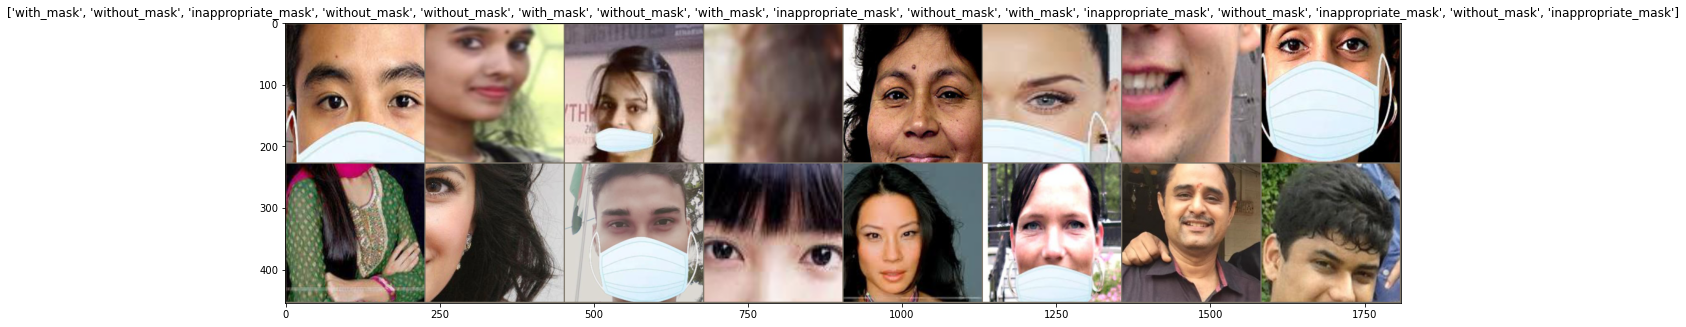

In [22]:
imshow(out, title=[class_names[x] for x in classes])

### Training the model

In [33]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    since = time.time()
    best_acc = 0.0
    best_model = copy.deepcopy(model.state_dict())
    
    new_freeze_state = None
    prev_freeze_state = False
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'test']:
            if phase == 'train':
                scheduler.step()
                model.train()
            else:
                model.eval()
            torch.cuda.empty_cache()    
            running_loss = 0.0
            running_corrects = 0
        
            
            for inputs, labels in dataloaders[phase]:
                torch.cuda.empty_cache()
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()

                
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc:{:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model = copy.deepcopy(model.state_dict())
            
            print()
    
    time_elapsed = time.time() - since
    print('Training complete in {:0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model)
    return model
                

In [34]:
import ssl


In [39]:
ssl._create_default_https_context = ssl._create_unverified_context

In [38]:
torch.cuda.empty_cache()
model_ft = models.resnet101(pretrained=True)
torch.cuda.empty_cache()
num_frts = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_frts, len(class_names))
torch.cuda.empty_cache()
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
torch.cuda.empty_cache()
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)
optimizer_ft = optim.Adagrad(model_ft.parameters(), lr=0.001)
torch.cuda.empty_cache()
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
torch.cuda.empty_cache()

RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 2.00 GiB total capacity; 1.16 GiB already allocated; 1.00 MiB free; 1.18 GiB reserved in total by PyTorch)

In [40]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=20)

Epoch 0/19
----------


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 2.00 GiB total capacity; 1.16 GiB already allocated; 1.00 MiB free; 1.18 GiB reserved in total by PyTorch)

In [41]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    #fig = plt.figure(figsize=(10,10))
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            print(preds,"predicitons")
            
            
            for j in range(inputs.size()[0]):
                images_so_far +=1
                #ax = plt.subplot(num_images//len(labels)-1, len(labels), images_so_far)
                #ax.axis('off')
                #ax.set_title('true: {} predicted: {}'.format(class_names[labels[j]], class_names[preds[j]]))
                print('true: {} predicted: {}'.format(class_names[labels[j]], class_names[preds[j]]))
                #imshow(inputs.cpu().data[j])
                
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [42]:
from google.colab import drive
drive.mount('/content/gdrive')



ModuleNotFoundError: No module named 'termios'

In [ ]:
!cd /content/gdrive/

In [ ]:
!ls

In [ ]:
torch.save(model_ft, '/content/gdrive/My Drive/mask1_model_resnet101.pth')

In [ ]:
visualize_model(model_ft)